In [1]:
!pip install nasdaq-data-link


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import nasdaqdatalink
# mydata = nasdaqdatalink.get("FRED/GDP")
sp500pe = nasdaqdatalink.get("MULTPL/SP500_PE_RATIO_MONTH")

sp500pe

,Value
Date,
1871-01-01,11.10
1871-02-01,11.25
1871-03-01,11.52
1871-04-01,11.85
1871-05-01,12.15
...,...
2023-05-01,24.00
2023-05-31,24.20
2023-06-01,25.15


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the ticker symbol for the S&P 500
ticker_symbol = "^GSPC"

# Set the start and end dates
start_date = "2007-01-01"
end_date = "2012-05-26"

# Fetch data from Yahoo Finance using yfinance library
sp500 = yf.download(ticker_symbol) #, start=start_date, end=end_date)
sp500

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2023-07-21,4550.160156,4555.000000,4535.790039,4536.339844,4536.339844,3570190000
2023-07-24,4543.390137,4563.410156,4541.290039,4554.640137,4554.640137,3856250000
2023-07-25,4555.189941,4580.620117,4552.419922,4567.459961,4567.459961,3812470000


In [4]:
# Clean and combine at first of the month
sp500_monthly = sp500[sp500.index.day == 1]
sp500pe_monthly = sp500pe[sp500pe.index.day == 1]

df = pd.concat([sp500_monthly, sp500pe_monthly["Value"]], axis=1).dropna()

df['Adj_Close_Change'] = df['Adj Close'].pct_change()
df['50-Day Moving Average'] = df['Adj Close'].rolling(window=50).mean()
df['200-Day Moving Average'] = df['Adj Close'].rolling(window=200).mean()
df['Time_Since_ATH'] = df['Adj Close'].cummax().index.to_series().diff().dt.days.fillna(0)
df

,Open,High,Low,Close,Adj Close,Volume,Value,Adj_Close_Change,50-Day Moving Average,200-Day Moving Average,Time_Since_ATH
Date,,,,,,,,,,,
1928-02-01,17.530001,17.530001,17.530001,17.530001,17.530001,0.000000e+00,15.00,NaN,NaN,NaN,0.0
1928-03-01,17.299999,17.299999,17.299999,17.299999,17.299999,0.000000e+00,15.51,-0.013120,NaN,NaN,29.0
1928-05-01,19.780001,19.780001,19.780001,19.780001,19.780001,0.000000e+00,16.37,0.143353,NaN,NaN,61.0
1928-06-01,20.070000,20.070000,20.070000,20.070000,20.070000,0.000000e+00,15.28,0.014661,NaN,NaN,31.0
1928-08-01,19.420000,19.420000,19.420000,19.420000,19.420000,0.000000e+00,15.33,-0.032387,NaN,NaN,61.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4076.570068,4.527130e+09,22.65,0.057174,3283.524014,1818.938652,30.0
2023-02-01,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4.856930e+09,23.62,0.010460,3323.673813,1835.736502,62.0
2023-03-01,3963.340088,3971.729980,3939.050049,3951.389893,3951.389893,4.249480e+09,22.97,-0.040741,3358.880010,1851.500801,28.0


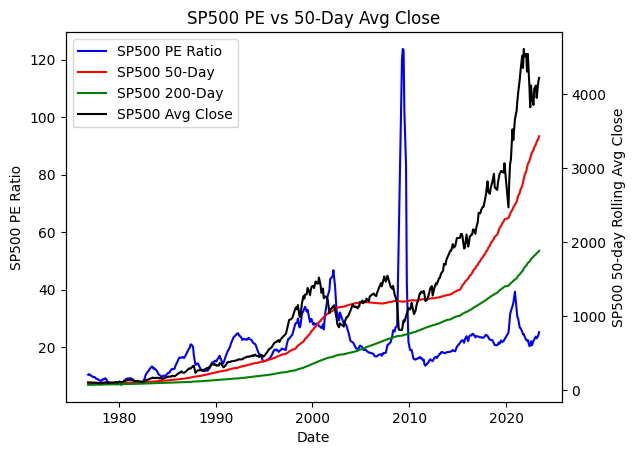

In [5]:
df30 = df[-12*30:].copy()

# # Plot the PE ratio
# plt.figure(figsize=(12, 6))
# plt.plot(df30.index, df30["Adj Close"], label="S&P 500 PE Ratio", color="blue")
# plt.xlabel("Date")
# plt.ylabel("PE Ratio")
# plt.title("S&P 500 Price-to-Earnings (PE) Ratio in the Last 10 Years")
# plt.legend()
# plt.grid(True)
# plt.show()



# Assuming you have two sets of data for the lines: x_data, y1_data, and y2_data

# Create a figure and two axes objects, one for each Y axis
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the first line using the left Y axis (ax1)
line1, = ax1.plot(df30.index, df30['Value'], label="SP500 PE Ratio", color="blue")

# Plot the second line using the right Y axis (ax2)
line2, = ax2.plot(df30.index, df30['50-Day Moving Average'], label="SP500 50-Day", color="red")

# Plot the second line using the right Y axis (ax2)
line3, = ax2.plot(df30.index, df30['200-Day Moving Average'], label="SP500 200-Day", color="green")

# Plot the second line using the right Y axis (ax2)
line4, = ax2.plot(df30.index, df30['Adj Close'], label="SP500 Avg Close", color="black")

# Set labels for the Y axes
ax1.set_ylabel("SP500 PE Ratio")
ax2.set_ylabel("SP500 50-day Rolling Avg Close")

# Set titles and legend
ax1.set_xlabel("Date")
ax1.set_title("SP500 PE vs 50-Day Avg Close")
lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels)

# Show the plot
plt.show()

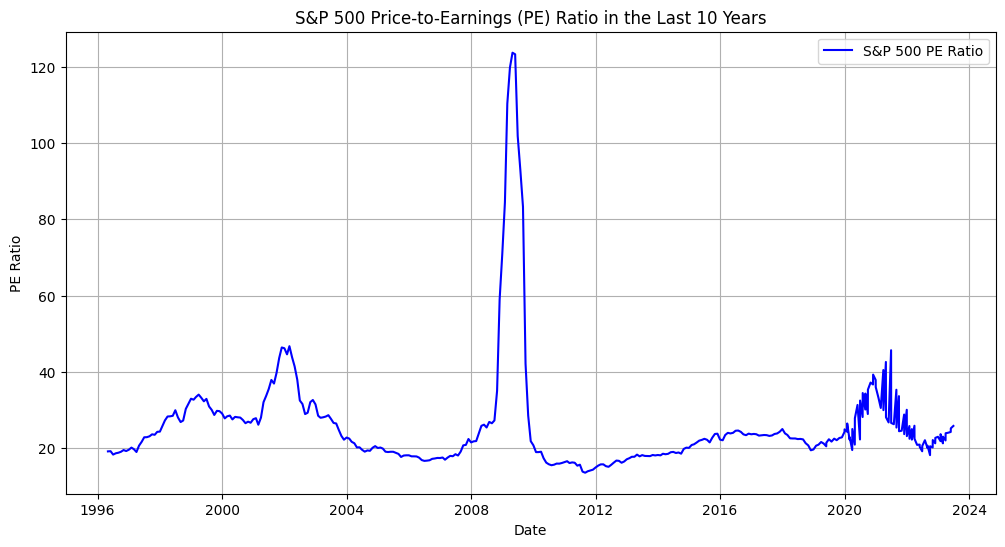

In [6]:
pe = sp500pe[-12*30:].copy()

# Plot the PE ratio
plt.figure(figsize=(12, 6))
plt.plot(pe.index, pe["Value"], label="S&P 500 PE Ratio", color="blue")
plt.xlabel("Date")
plt.ylabel("PE Ratio")
plt.title("S&P 500 Price-to-Earnings (PE) Ratio in the Last 10 Years")
plt.legend()
plt.grid(True)
plt.show()

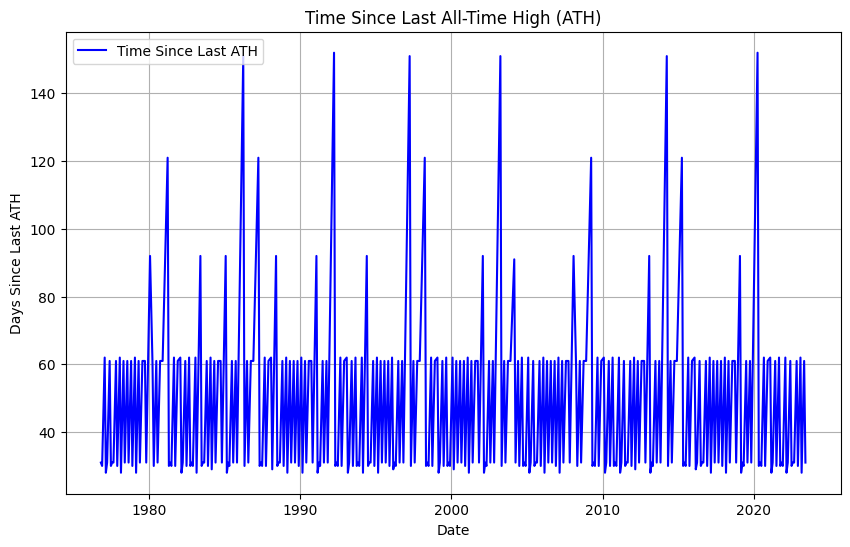

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df30 = df[-12*30:].copy()

# Create a new plot for the time since the last ATH
plt.figure(figsize=(10, 6))
plt.plot(df30.index, df30['Time_Since_ATH'], label="Time Since Last ATH", color="blue")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Days Since Last ATH")
plt.title("Time Since Last All-Time High (ATH)")
plt.grid(True)
plt.legend()
plt.show()

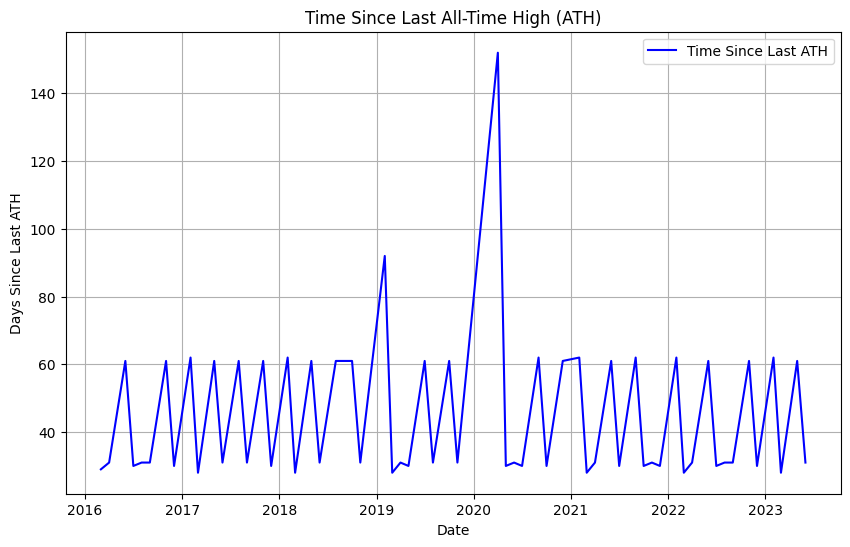

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df30 = df[-12*5:].copy()

# Create a new plot for the time since the last ATH
plt.figure(figsize=(10, 6))
plt.plot(df30.index, df30['Time_Since_ATH'], label="Time Since Last ATH", color="blue")

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Days Since Last ATH")
plt.title("Time Since Last All-Time High (ATH)")
plt.grid(True)
plt.legend()
plt.show()